# Acceotability of modal nouns with matrix tense operators

**сухой остаток**

- 

## data

In [1]:
import pandas as pd
import numpy as np

In [2]:
examples = pd.read_csv('./experiment.csv')

In [3]:
# sorted(zip(labels, values), key=lambda x: x[1], reverse=False)[:5]

In [4]:
# # example lookop
# n = int(input())
# ex = examples.loc[examples['ITEM'] == n]
# print(ex['SENTENCE'].values[0])
# print('case: ', ex['CASE'].values[0])
# print('modifier: ', ex['MODIFIER'].values[0])
# print('collocation: ', ex['COLLOCATION'].values[0])

In [5]:
import re

cols = '''# 1. Results reception time.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Order number of item.
# 5. Inner element number.
# 6. Label.
# 7. Latin Square Group.
# 8. PennElementType.
# 9. PennElementName.
# 10. Parameter.
# 11. Value.
# 12. EventTime.
# 13. code.
# 14. linguist.
# 15. gender.
# 16. age.
# 17. Comments.
# 17. ITEM.
# 18. CONDITION.
# 19. COLLOCATION.
# 20. MODIFIER.
# 21. CASE.
# 22. TYPE.
# 23. FILLER_TYPE.
# 24. Comments.'''

rgx = r'# \d{,2}\. (.+?)\.'
cols = re.findall(rgx, cols)

In [6]:
cols = ['reception_time',
 "md5_ip",
 'controller_name',
 'item_number',
 'inner_ele_number',
 'label',
 'lsg',
 'PennElementType',
 'PennElementName',
 'Parameter',
 'Value',
 'EventTime',
 'code',
 'linguist',
 'gender',
 'age',
 'item',
 'CONDITION',
 'COLLOCATION',
 'MODIFIER',
 'CASE',
 'TYPE',
 'FILLER_TYPE',
 'Comments2']

cols = [ele.lower() for ele in cols]

In [7]:
data = pd.read_csv('results-27112023.csv', comment='#', header=None, names=cols)

In [8]:
data.columns

Index(['reception_time', 'md5_ip', 'controller_name', 'item_number',
       'inner_ele_number', 'label', 'lsg', 'pennelementtype',
       'pennelementname', 'parameter', 'value', 'eventtime', 'code',
       'linguist', 'gender', 'age', 'item', 'condition', 'collocation',
       'modifier', 'case', 'type', 'filler_type', 'comments2'],
      dtype='object')

In [9]:
# number of participants
data['code'].nunique()

39

In [10]:
# number of ips
data['md5_ip'].nunique()

39

In [11]:
# data.to_csv('data.csv')

In [12]:
data['item'].unique().shape

(54,)

## sanity checks


In [13]:
data['type'].value_counts()

Series([], Name: type, dtype: int64)

In [14]:
data

,reception_time,md5_ip,controller_name,item_number,inner_ele_number,label,lsg,pennelementtype,pennelementname,parameter,...,gender,age,item,condition,collocation,modifier,case,type,filler_type,comments2
0,1696317469,35d05d7fad1466d30794182759bbe855,PennController,1,0,ethics,NaN,PennController,0,_Trial_,...,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1696317469,35d05d7fad1466d30794182759bbe855,PennController,1,0,ethics,NaN,PennController,0,_Header_,...,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1696317469,35d05d7fad1466d30794182759bbe855,PennController,1,0,ethics,NaN,PennController,0,_Header_,...,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1696317469,35d05d7fad1466d30794182759bbe855,PennController,1,0,ethics,NaN,PennController,0,_Trial_,...,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1696317469,35d05d7fad1466d30794182759bbe855,PennController,3,0,participants,NaN,PennController,1,_Trial_,...,женский,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,1700145647,d6a125603aa43b074e6f79abea5769ef,PennController,21,0,experiment-filler,NaN,PennController,20,_Header_,...,мужской,38,filler-bad-5,NaN,NaN,filler,bad,NaN,NaN,NaN
4521,1700145647,d6a125603aa43b074e6f79abea5769ef,PennController,21,0,experiment-filler,NaN,PennController,20,_Trial_,...,мужской,38,filler-bad-5,NaN,NaN,filler,bad,NaN,NaN,NaN
4522,1700145647,d6a125603aa43b074e6f79abea5769ef,PennController,21,0,experiment-filler,NaN,PennController,20,_Header_,...,мужской,38,filler-bad-5,NaN,NaN,filler,bad,NaN,NaN,NaN
4523,1700145647,d6a125603aa43b074e6f79abea5769ef,PennController,21,0,experiment-filler,NaN,Scale,Scale,Choice,...,мужской,38,filler-bad-5,NaN,NaN,filler,bad,NaN,NaN,NaN


In [15]:
jmnts = data.loc[(data['parameter'] == 'Choice') & (data['pennelementname'] == 'Scale')]
jmnts['value'] = jmnts['value'].astype(int)
jmnts.rename(columns={'condition': 'predicate', 'collocation': 'tense'}, inplace=True)

<ipython-input-15-746ab94741c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jmnts['value'] = jmnts['value'].astype(int)
<ipython-input-15-746ab94741c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jmnts.rename(columns={'condition': 'predicate', 'collocation': 'tense'}, inplace=True)


In [16]:
jmnts['type'].value_counts()

Series([], Name: type, dtype: int64)

In [17]:
jmnts.groupby('filler_type')['value'].mean()

Series([], Name: value, dtype: float64)

In [18]:
jmnts.label

20               exercise
25               exercise
30               exercise
39        experiment-item
44      experiment-filler
              ...        
4503    experiment-filler
4508      experiment-item
4513    experiment-filler
4518      experiment-item
4523    experiment-filler
Name: label, Length: 741, dtype: object

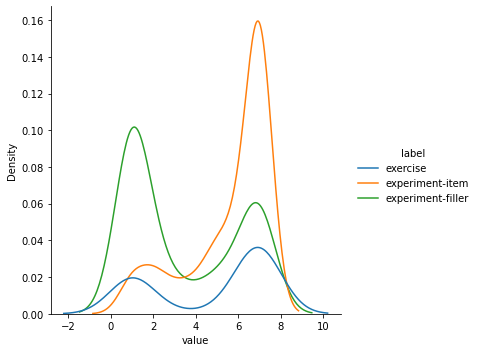

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=jmnts, x="value", hue="label", kind="kde")
# plt.savefig('images/unnorm_dist.png')

### remove outliers

In [20]:
data.sample(3)

,reception_time,md5_ip,controller_name,item_number,inner_ele_number,label,lsg,pennelementtype,pennelementname,parameter,...,gender,age,item,condition,collocation,modifier,case,type,filler_type,comments2
4092,1700060813,3c33ea3c8b5a75a6afd509fd807b1cf5,PennController,6,0,exercise,NaN,PennController,6,_Trial_,...,мужской,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2560,1696766370,753516a8c4f0148d27c79949008ec7f0,PennController,3,0,participants,NaN,TextInput,input_age,First,...,женский,26,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,1696520873,6edf3653646f9738ad740a1c22ac31de,PennController,11,0,experiment-item,NaN,Scale,Scale,Choice,...,другое,21,poss-PST-3,poss,PST,item,NaN,NaN,NaN,NaN


In [21]:
fillers = data.loc[(data['parameter'] == 'Choice') & 
                   (data['pennelementname'] == 'Scale') &
                   (data['item'].str.contains('filler'))]

In [22]:
fillers.head()

,reception_time,md5_ip,controller_name,item_number,inner_ele_number,label,lsg,pennelementtype,pennelementname,parameter,...,gender,age,item,condition,collocation,modifier,case,type,filler_type,comments2
44,1696317469,35d05d7fad1466d30794182759bbe855,PennController,21,0,experiment-filler,NaN,Scale,Scale,Choice,...,женский,20,filler-good-5,NaN,NaN,filler,good,NaN,NaN,NaN
54,1696317469,35d05d7fad1466d30794182759bbe855,PennController,24,0,experiment-filler,NaN,Scale,Scale,Choice,...,женский,20,filler-bad-8,NaN,NaN,filler,bad,NaN,NaN,NaN
64,1696317469,35d05d7fad1466d30794182759bbe855,PennController,23,0,experiment-filler,NaN,Scale,Scale,Choice,...,женский,20,filler-good-7,NaN,NaN,filler,good,NaN,NaN,NaN
74,1696317469,35d05d7fad1466d30794182759bbe855,PennController,20,0,experiment-filler,NaN,Scale,Scale,Choice,...,женский,20,filler-bad-4,NaN,NaN,filler,bad,NaN,NaN,NaN
84,1696317469,35d05d7fad1466d30794182759bbe855,PennController,19,0,experiment-filler,NaN,Scale,Scale,Choice,...,женский,20,filler-good-3,NaN,NaN,filler,good,NaN,NaN,NaN


In [23]:
fillers['grammatical'] = fillers['item'].apply(lambda x: x.split('-')[1] if 'filler' in x else None)
fillers['grammatical'] = fillers['grammatical'].map({'bad':0, 'good':1})
fillers['value'] = fillers['value'].astype(int)

<ipython-input-23-16e172adc694>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fillers['grammatical'] = fillers['item'].apply(lambda x: x.split('-')[1] if 'filler' in x else None)
<ipython-input-23-16e172adc694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fillers['grammatical'] = fillers['grammatical'].map({'bad':0, 'good':1})
<ipython-input-23-16e172adc694>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [24]:
ips = pd.pivot_table(fillers, values='value', index='code', columns='grammatical', aggfunc=np.average)
ips = ips.reset_index().rename_axis(None, axis=1)
ips

,code,0,1
0,+JJcwpfssMZ93cy4Wi78rQ,1.00,2.50
1,/bI3m+fT2lFpVWZHDsiXhQ,1.00,5.00
2,10eHGWrvrvff+LJsFGnQcQ,1.25,7.00
3,1KjhDwOcBb68qjcVT7bF7g,1.75,7.00
4,2wHyAT2TS1ka+NoXTGjDRA,2.50,5.75
5,6I8EDEfMz2L48fO/G3WxEw,1.00,5.25
6,6lawAfhCqFt/P0QusdA4vw,1.00,5.25
7,7/um/xY7Lp1lAwhtC7hCDg,1.50,3.25
8,76RrW3Um6l4twJVOGb0ERA,1.00,6.00
9,HHde3fZpsdStc4R/+P1ftg,1.75,4.50


In [25]:
bad = []

for row in ips.loc[(ips[1] <= 4) | (ips[0] >= 4)].iterrows():
    bad.append(row[0])
    
bad = list(bad)
list(ips.loc[bad]['code'])

['+JJcwpfssMZ93cy4Wi78rQ',
 '7/um/xY7Lp1lAwhtC7hCDg',
 'ayBZLYxqgMVESkTmYW8fOA',
 'pvGN9NXppOqCUMel4AtsfQ']

In [26]:
# untrustworthy dudes
len(bad)

4

## z-scoring

In [27]:
jmnts.columns

Index(['reception_time', 'md5_ip', 'controller_name', 'item_number',
       'inner_ele_number', 'label', 'lsg', 'pennelementtype',
       'pennelementname', 'parameter', 'value', 'eventtime', 'code',
       'linguist', 'gender', 'age', 'item', 'predicate', 'tense', 'modifier',
       'case', 'type', 'filler_type', 'comments2'],
      dtype='object')

In [28]:
# clean judgements table

def not_in_bad(s):
    
    if s in bad:
        return False
    else:
        return True        

jmnts = jmnts.loc[jmnts['code'].apply(not_in_bad)]
jmnts = jmnts[['reception_time', 'code', 'item_number', 'label',
       'parameter', 'value',
       'linguist', 'gender', 'age', 'item', 'predicate', 'tense', 'filler_type']]

In [29]:
# jmnts.sample(3)
jmnts.groupby('code').count()['label']

code
+JJcwpfssMZ93cy4Wi78rQ    19
/bI3m+fT2lFpVWZHDsiXhQ    19
10eHGWrvrvff+LJsFGnQcQ    19
1KjhDwOcBb68qjcVT7bF7g    19
2wHyAT2TS1ka+NoXTGjDRA    19
6I8EDEfMz2L48fO/G3WxEw    19
6lawAfhCqFt/P0QusdA4vw    19
7/um/xY7Lp1lAwhtC7hCDg    19
76RrW3Um6l4twJVOGb0ERA    19
HHde3fZpsdStc4R/+P1ftg    19
JFQBr8zH0h/7nRs0BZs0zw    19
JoUhi3e1MM7MR7xqdr/R1w    19
Oh+xQ42qprPIadp+gYBc9Q    19
Prw615X0GhfG6Aip/1JfPA    19
QM3xc5wY3br80kwmv2xQ4Q    19
TrUY1zDwcppHmq8jxoszPA    19
UwcR9E2RaClBAOCbRX5TDg    19
WJ4t2sPmX3/UAzEkrHr9GQ    19
XpUm2CQIOLh/GWGIjyxVxg    19
Y7KLnJpbRs43yYtI4zLoLw    19
ayBZLYxqgMVESkTmYW8fOA    19
ch16JGH3wHtEAaWw5oQwVg    19
duNshRuh2iybB2HQJdVU5Q    19
e0EGpaSUjhTg3+8dbZDZJw    19
e13t2nfdpDC0I/bUSTmeHw    19
ezrc43WwonvTb2B4V7xidw    19
fFyZdtQE8SOFday7kzRURw    19
fTRPNp8pcophjoODuCU7eg    19
hJ8NxQt2ShknnYoP8up8ww    19
jQemFFvqLD2HSaE/tZHFjg    19
jylkZcSVrtWJ2FLFhNgrKg    19
jzhWhCQR734ILxlvESUeDw    19
miLpxPOf9Gb/hCJlF7uKPA    19
pvGN9NXppOqCUMel4AtsfQ    19
s5CFSXpMM

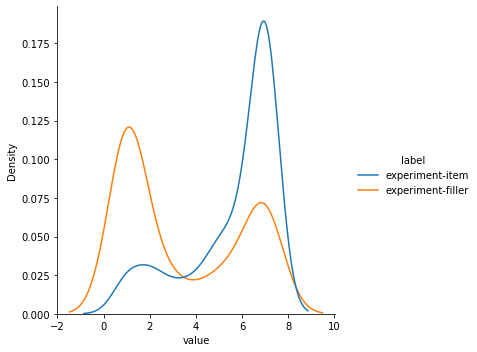

In [86]:
import matplotlib.pyplot as plt

sns.displot(data=jmnts.loc[~jmnts.label.str.contains('exercise')], x="value", hue="label", kind="kde")
# plt.savefig('images/unnorm_dist.png')

## metadata

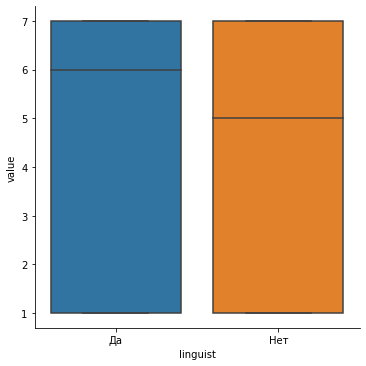

In [31]:
sns.catplot(data=jmnts, x="linguist", y="value", kind="box")

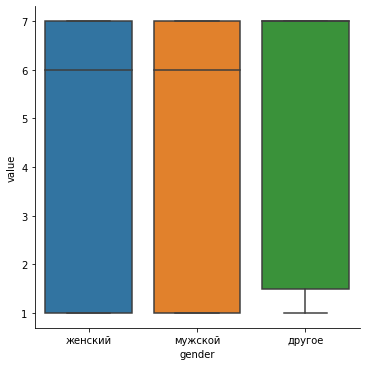

In [32]:
sns.catplot(data=jmnts, x="gender", y="value", kind="box")

<AxesSubplot:xlabel='age', ylabel='value'>

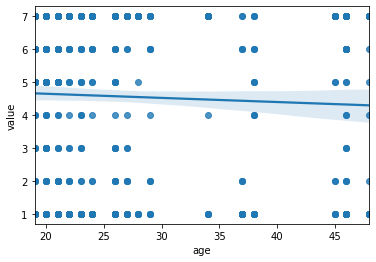

In [33]:
jmnts['age'] = jmnts['age'].astype(int)
sns.regplot(data=jmnts, x="age", y="value")

## z-scoring

In [34]:
#jmnts.to_csv('pr_results.csv')
jmnts.shape
data.shape

(4525, 24)

In [35]:
jmnts.columns

Index(['reception_time', 'code', 'item_number', 'label', 'parameter', 'value',
       'linguist', 'gender', 'age', 'item', 'predicate', 'tense',
       'filler_type'],
      dtype='object')

In [36]:
# z-score the data
from scipy import stats as sp

scores = pd.pivot_table(jmnts, values='value', index=['code'], columns=['item'])

d = sp.zscore(scores, nan_policy='omit')
labels = scores.columns
ips = scores.index
zscores = pd.DataFrame(d, index=ips, columns=labels)
zscores = pd.DataFrame(zscores.to_records())
zscores

,code,filler-bad-1,filler-bad-2,filler-bad-3,filler-bad-4,filler-bad-5,filler-bad-6,filler-bad-7,filler-bad-8,filler-good-1,...,seem-NPST-7,seem-NPST-8,seem-PST-1,seem-PST-2,seem-PST-3,seem-PST-4,seem-PST-5,seem-PST-6,seem-PST-7,seem-PST-8
0,+JJcwpfssMZ93cy4Wi78rQ,-0.229416,NaN,-0.333333,NaN,-0.538816,NaN,-0.685994,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.708484,NaN,NaN,NaN,-2.811721
1,/bI3m+fT2lFpVWZHDsiXhQ,NaN,-0.273722,NaN,-0.235702,NaN,-0.766464,NaN,NaN,-0.310087,...,NaN,NaN,NaN,NaN,-2.313407,NaN,NaN,NaN,0.632456,NaN
2,10eHGWrvrvff+LJsFGnQcQ,NaN,-0.273722,NaN,-0.235702,NaN,-0.281037,NaN,NaN,0.868243,...,NaN,NaN,0.534522,NaN,NaN,NaN,0.534522,NaN,NaN,NaN
3,1KjhDwOcBb68qjcVT7bF7g,NaN,-0.273722,NaN,-0.235702,NaN,0.689818,NaN,NaN,0.868243,...,NaN,NaN,0.534522,NaN,NaN,NaN,0.534522,NaN,NaN,NaN
4,2wHyAT2TS1ka+NoXTGjDRA,NaN,-0.273722,NaN,-0.235702,NaN,2.146100,NaN,NaN,-1.488417,...,NaN,NaN,NaN,NaN,0.544331,NaN,NaN,NaN,0.632456,NaN
5,6I8EDEfMz2L48fO/G3WxEw,-0.229416,NaN,-0.333333,NaN,-0.538816,NaN,-0.685994,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.138990,NaN,NaN,NaN,-0.055132
6,6lawAfhCqFt/P0QusdA4vw,-0.229416,NaN,-0.333333,NaN,-0.538816,NaN,-0.685994,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.759326,NaN,NaN,NaN,0.496186
7,7/um/xY7Lp1lAwhtC7hCDg,NaN,-0.273722,NaN,-0.235702,NaN,0.204390,NaN,NaN,-1.488417,...,NaN,NaN,0.534522,NaN,NaN,NaN,0.534522,NaN,NaN,NaN
8,76RrW3Um6l4twJVOGb0ERA,NaN,-0.273722,NaN,-0.235702,NaN,-0.766464,NaN,NaN,0.868243,...,NaN,NaN,0.534522,NaN,NaN,NaN,0.534522,NaN,NaN,NaN
9,HHde3fZpsdStc4R/+P1ftg,NaN,-0.273722,NaN,4.242641,NaN,0.204390,NaN,NaN,-2.077582,...,NaN,NaN,NaN,NaN,0.544331,NaN,NaN,NaN,0.632456,NaN


In [37]:
tr_jmnts = zscores.melt(id_vars=['code'], value_vars=labels).dropna()

In [38]:
tr_jmnts = tr_jmnts.merge(jmnts, left_on=['variable', 'code'], right_on=['item', 'code'])\
    .rename(columns={'value_x': 'tr_value',
             'value_y': 'value'})

In [105]:
tr_jmnts['label2'] = tr_jmnts['item'].apply(lambda x: '-'.join(x.split('-')[:-1]))
tr_jmnts.rename(columns={'label2': 'item_kind'}, inplace=True)

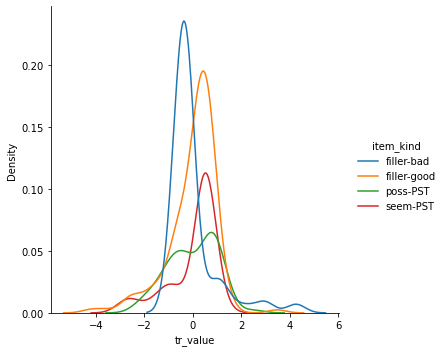

In [110]:
sns.displot(data=tr_jmnts.loc[~tr_jmnts.item_kind.str.contains('NPST')], x="tr_value", hue="item_kind", kind="kde")
plt.savefig('images/pst_dist.png')

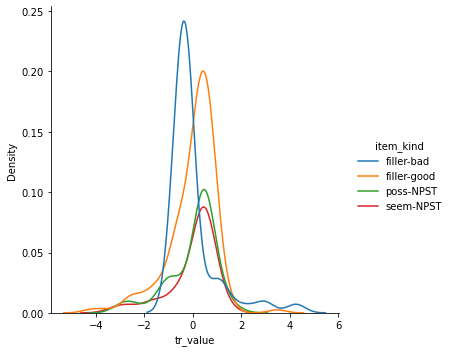

In [111]:
sns.displot(data=tr_jmnts.loc[~tr_jmnts.item_kind.str.contains('-PST')], x="tr_value", hue="item_kind", kind="kde")
plt.savefig('images/npst_dist.png')

## test items overview

In [40]:
jmnts.sample()

,reception_time,code,item_number,label,parameter,value,linguist,gender,age,item,predicate,tense,filler_type
4019,1700060489,10eHGWrvrvff+LJsFGnQcQ,17,experiment-filler,Choice,7,Нет,женский,22,filler-good-1,NaN,NaN,NaN


In [41]:
jmnts['predicate'].unique()

array([nan, 'seem', 'poss'], dtype=object)

In [42]:
jmnts['tense'].unique()

array([nan, 'PST', 'NPST'], dtype=object)

In [43]:
jmnts.sample()

,reception_time,code,item_number,label,parameter,value,linguist,gender,age,item,predicate,tense,filler_type
1214,1696508870,Prw615X0GhfG6Aip/1JfPA,22,experiment-filler,Choice,1,Нет,женский,46,filler-bad-6,NaN,NaN,NaN


In [44]:
jmnts['item_description'] = jmnts['item'].astype(str)
jmnts['item_description']

20                nan
25                nan
30                nan
39         seem-PST-1
44      filler-good-5
            ...      
4503    filler-good-8
4508      seem-NPST-4
4513    filler-good-6
4518       poss-PST-1
4523     filler-bad-5
Name: item_description, Length: 741, dtype: object

In [45]:
from matplotlib.pyplot import figure

labels = jmnts.dropna(subset=['item_description']).groupby('item').last()['item_description']
values = jmnts.dropna(subset=['item_description']).groupby('item').mean()['value']
errors = jmnts.dropna(subset=['item_description']).groupby('item').std()['value']

predicates = ['seem', 'poss']
predicate_colors = ['pink', 'grey']

tenses = ['PST', 'NPST']
tense_colors = ['blue', 'orange']

<ipython-input-45-757522fc1b95>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = jmnts.dropna(subset=['item_description']).groupby('item').mean()['value']
<ipython-input-45-757522fc1b95>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  errors = jmnts.dropna(subset=['item_description']).groupby('item').std()['value']


In [46]:
errors

item
filler-bad-1     0.894427
filler-bad-2     1.382852
filler-bad-3     0.307794
filler-bad-4     0.229416
filler-bad-5     0.571241
filler-bad-6     2.116491
filler-bad-7     0.598243
filler-bad-8     0.000000
filler-good-1    1.743828
filler-good-2    1.225819
filler-good-3    0.917663
filler-good-4    1.598519
filler-good-5    1.370107
filler-good-6    1.251315
filler-good-7    1.315673
filler-good-8    1.618967
poss-NPST-1      2.330951
poss-NPST-2      0.621582
poss-NPST-3      1.337494
poss-NPST-4      1.603567
poss-NPST-5      2.065591
poss-NPST-6      0.651339
poss-NPST-7      0.632456
poss-NPST-8      1.496026
poss-PST-1       2.668749
poss-PST-2       2.410295
poss-PST-3       1.264911
poss-PST-4       1.764550
poss-PST-5       1.702939
poss-PST-6       2.214670
poss-PST-7       1.946507
poss-PST-8       1.946247
seem-NPST-1      2.340126
seem-NPST-2      1.663330
seem-NPST-3      0.288675
seem-NPST-4      2.011080
seem-NPST-5      0.487950
seem-NPST-6      0.966092
seem-NP

In [47]:
for key, val in zip(labels, values):
    print(key, val)

filler-bad-1 1.2
filler-bad-2 1.368421052631579
filler-bad-3 1.1
filler-bad-4 1.0526315789473684
filler-bad-5 1.3
filler-bad-6 2.5789473684210527
filler-bad-7 1.4
filler-bad-8 1.0
filler-good-1 5.526315789473684
filler-good-2 6.35
filler-good-3 6.7894736842105265
filler-good-4 4.85
filler-good-5 5.894736842105263
filler-good-6 1.75
filler-good-7 6.2105263157894735
filler-good-8 6.1
poss-NPST-1 4.1
poss-NPST-2 6.75
poss-NPST-3 6.3
poss-NPST-4 2.2857142857142856
poss-NPST-5 4.6
poss-NPST-6 6.666666666666667
poss-NPST-7 6.8
poss-NPST-8 6.285714285714286
poss-PST-1 3.3
poss-PST-2 4.857142857142857
poss-PST-3 5.4
poss-PST-4 2.75
poss-PST-5 3.7
poss-PST-6 5.285714285714286
poss-PST-7 5.3
poss-PST-8 5.166666666666667
seem-NPST-1 4.857142857142857
seem-NPST-2 6.1
seem-NPST-3 6.916666666666667
seem-NPST-4 4.4
seem-NPST-5 6.714285714285714
seem-NPST-6 6.4
seem-NPST-7 7.0
seem-NPST-8 6.9
seem-PST-1 6.666666666666667
seem-PST-2 6.4
seem-PST-3 6.428571428571429
seem-PST-4 4.6
seem-PST-5 6.666666666

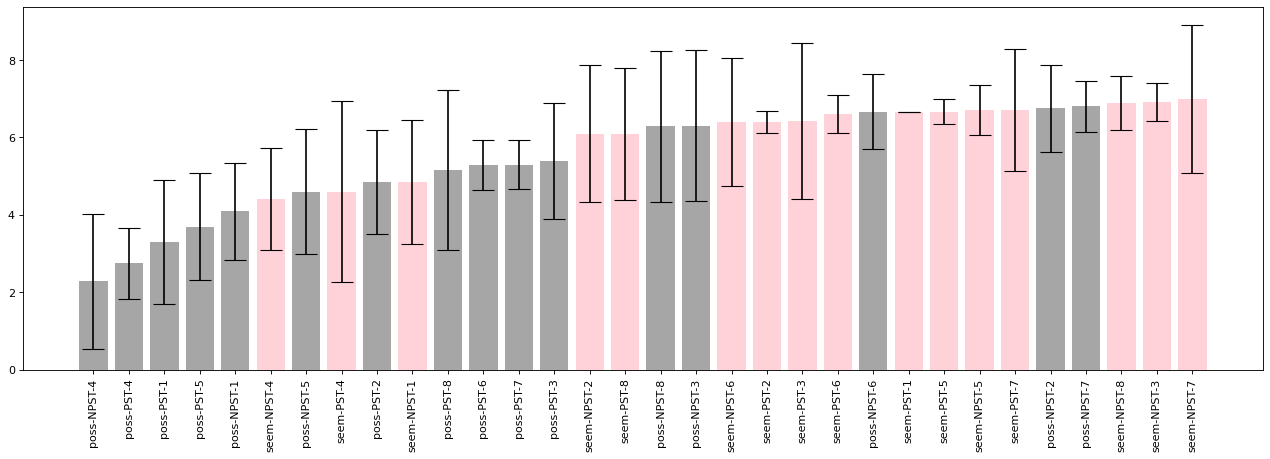

In [48]:
figure(figsize=(20, 6), dpi=80)
i = 0
for key, val in sorted(zip(labels, values), key=lambda x: x[1]):
    if 'filler' not in key:
        plt.bar(key, val, color=predicate_colors[predicates.index(key.split('-')[0])], yerr=errors.values[i], 
                align='center', alpha=0.7, ecolor='black', capsize=10)
    i += 1
plt.xticks(rotation=90)
plt.show()

# collocs = ['colloc', 'no_colloc']
# colloc_colors = ['pink', 'grey']

# plt.savefig('images/colloc_bars.png')

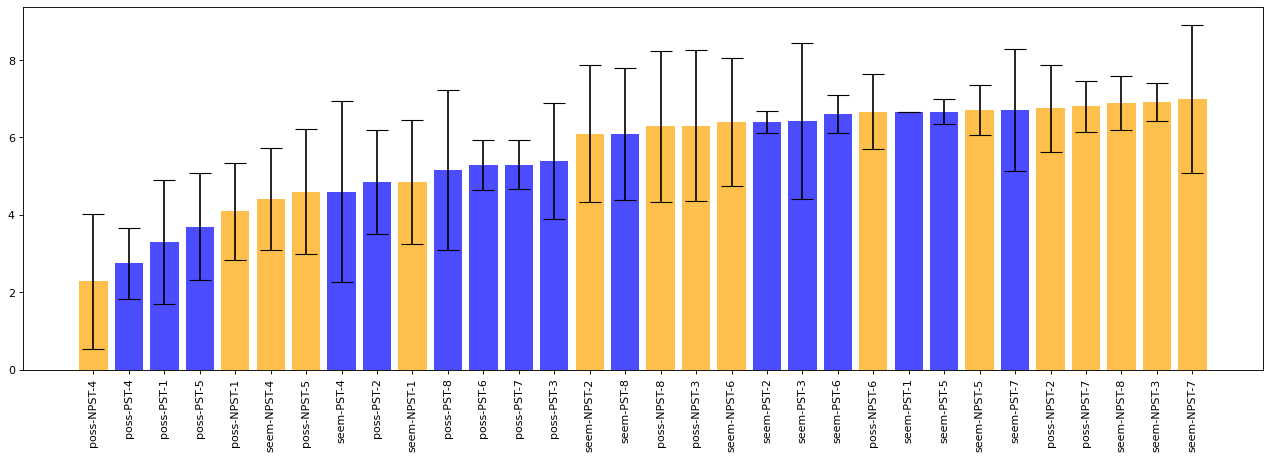

In [49]:
figure(figsize=(20, 6), dpi=80)
i = 0
for key, val in sorted(zip(labels, values), key=lambda x: x[1]):
    if 'filler' not in key:
        plt.bar(key, val, color=tense_colors[tenses.index(key.split('-')[1])], yerr=errors.values[i], 
                align='center', alpha=0.7, ecolor='black', capsize=10)
    i += 1
plt.xticks(rotation=90)
plt.show()

# collocs = ['colloc', 'no_colloc']
# colloc_colors = ['pink', 'grey']

# plt.savefig('images/colloc_bars.png')

## regression

In [50]:
tr_jmnts.shape

(593, 15)

In [51]:
tr_jmnts

,code,variable,tr_value,reception_time,item_number,label,parameter,value,linguist,gender,age,item,predicate,tense,filler_type
0,+JJcwpfssMZ93cy4Wi78rQ,filler-bad-1,-0.229416,1700060118,17,experiment-filler,Choice,1,Нет,женский,37,filler-bad-1,NaN,NaN,NaN
1,6I8EDEfMz2L48fO/G3WxEw,filler-bad-1,-0.229416,1696510927,17,experiment-filler,Choice,1,Да,женский,19,filler-bad-1,NaN,NaN,NaN
2,6lawAfhCqFt/P0QusdA4vw,filler-bad-1,-0.229416,1698317404,17,experiment-filler,Choice,1,Да,женский,21,filler-bad-1,NaN,NaN,NaN
3,JFQBr8zH0h/7nRs0BZs0zw,filler-bad-1,-0.229416,1696508819,17,experiment-filler,Choice,1,Да,женский,19,filler-bad-1,NaN,NaN,NaN
4,QM3xc5wY3br80kwmv2xQ4Q,filler-bad-1,4.358899,1696507554,17,experiment-filler,Choice,5,Нет,мужской,20,filler-bad-1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,e0EGpaSUjhTg3+8dbZDZJw,seem-PST-8,0.496186,1700061108,16,experiment-item,Choice,7,Нет,мужской,29,seem-PST-8,seem,PST,NaN
589,hJ8NxQt2ShknnYoP8up8ww,seem-PST-8,0.496186,1696520873,16,experiment-item,Choice,7,Да,другое,21,seem-PST-8,seem,PST,NaN
590,jzhWhCQR734ILxlvESUeDw,seem-PST-8,0.496186,1697043883,16,experiment-item,Choice,7,Да,женский,20,seem-PST-8,seem,PST,NaN
591,s5CFSXpMMS/X/QYJtgXjhA,seem-PST-8,0.496186,1696508061,16,experiment-item,Choice,7,Да,женский,19,seem-PST-8,seem,PST,NaN


In [52]:
pre_X = tr_jmnts.loc[tr_jmnts['label'].str.contains('item')][['tr_value', 'linguist', 'gender', 'age', 
                                                     'predicate', 'tense']]
pre_X['age'] = pre_X['age'].astype(int)

In [53]:
pre_X

,tr_value,linguist,gender,age,predicate,tense
293,-0.949653,Нет,женский,37,poss,NPST
294,1.311425,Да,женский,19,poss,NPST
295,0.859210,Да,женский,21,poss,NPST
296,0.859210,Да,женский,19,poss,NPST
297,-0.949653,Нет,мужской,20,poss,NPST
...,...,...,...,...,...,...
588,0.496186,Нет,мужской,29,seem,PST
589,0.496186,Да,другое,21,seem,PST
590,0.496186,Да,женский,20,seem,PST
591,0.496186,Да,женский,19,seem,PST


In [54]:
X = pd.get_dummies(pre_X[['linguist', 'gender', 'predicate', 'tense']])
X['age'] = (pre_X['age'] - pre_X['age'].mean()) / pre_X['age'].std()
X = X.drop(columns=['linguist_Нет', 'gender_другое', 'predicate_seem', 'tense_NPST'])

In [55]:
X

,linguist_Да,gender_женский,gender_мужской,predicate_poss,tense_PST,age
293,0,1,0,1,0,1.176929
294,1,1,0,1,0,-0.849025
295,1,1,0,1,0,-0.623919
296,1,1,0,1,0,-0.849025
297,0,0,1,1,0,-0.736472
...,...,...,...,...,...,...
588,0,0,1,0,1,0.276505
589,1,0,0,0,1,-0.623919
590,1,1,0,0,1,-0.736472
591,1,1,0,0,1,-0.849025


In [56]:
import statsmodels.api as sm
from scipy import stats

# X = X[['collocation_colloc', 'modifier_odin', 'modifier_sam', 'case_nom']]
X = X
y = pre_X['tr_value']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
# print(est.fit().f_pvalue)

In [57]:
data['linguist'].value_counts()

Да           2353
Нет          2016
undefined     156
Name: linguist, dtype: int64

In [58]:
jmnts.linguist.value_counts()

Да     399
Нет    342
Name: linguist, dtype: int64

In [59]:
results = est.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               tr_value   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.436
Date:                Mon, 27 Nov 2023   Prob (F-statistic):             0.0258
Time:                        16:28:59   Log-Likelihood:                -418.38
No. Observations:                 300   AIC:                             850.8
Df Residuals:                     293   BIC:                             876.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0906      0.381      0.

In [60]:
from statsmodels.iolib.summary2 import summary_col

print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    tr\_value     & \textbf{  R-squared:         } &     0.048   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.028   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     2.436   \\
\textbf{Date:}             & Mon, 27 Nov 2023 & \textbf{  Prob (F-statistic):} &   0.0258    \\
\textbf{Time:}             &     16:28:59     & \textbf{  Log-Likelihood:    } &   -418.38   \\
\textbf{No. Observations:} &         300      & \textbf{  AIC:               } &     850.8   \\
\textbf{Df Residuals:}     &         293      & \textbf{  BIC:               } &     876.7   \\
\textbf{Df Model:}         &           6      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                         & \textbf{coef

In [61]:
from sklearn.linear_model import Ridge
import numpy as np

clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

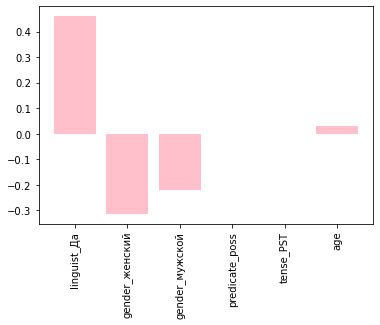

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

Y = clf.coef_
x = list(X.columns)

plt.bar(x, Y, color='pink')
plt.xticks(rotation=90)
# plt.show()
# plt.savefig('weights.png')

# plt.savefig('../seminar_talk/images/regr_weights.png', bbox_inches='tight')

## boosting

### one hot encoded

In [63]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [64]:
pre_X

,tr_value,linguist,gender,age,predicate,tense
293,-0.949653,Нет,женский,37,poss,NPST
294,1.311425,Да,женский,19,poss,NPST
295,0.859210,Да,женский,21,poss,NPST
296,0.859210,Да,женский,19,poss,NPST
297,-0.949653,Нет,мужской,20,poss,NPST
...,...,...,...,...,...,...
588,0.496186,Нет,мужской,29,seem,PST
589,0.496186,Да,другое,21,seem,PST
590,0.496186,Да,женский,20,seem,PST
591,0.496186,Да,женский,19,seem,PST


In [65]:
# X = pre_X[pre_X.columns[1:]]
X = X
y = pre_X['tr_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
train_dataset = cb.Pool(X_train, y_train, cat_features=[]) 
test_dataset = cb.Pool(X_test, y_test, cat_features=[])
model = cb.CatBoostRegressor(loss_function='RMSE')

iteritems is deprecated and will be removed in a future version. Use .items instead.


In [66]:
grid = {'iterations': [100, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 5, 8],
        'l2_leaf_reg': [0.2, 0.5, 1]}
model.grid_search(grid, train_dataset)

0:	learn: 1.0247835	test: 0.9575453	best: 0.9575453 (0)	total: 60.3ms	remaining: 5.97s
1:	learn: 1.0230390	test: 0.9585439	best: 0.9575453 (0)	total: 62ms	remaining: 3.04s
2:	learn: 1.0214729	test: 0.9595212	best: 0.9575453 (0)	total: 63ms	remaining: 2.04s
3:	learn: 1.0200946	test: 0.9606967	best: 0.9575453 (0)	total: 63.8ms	remaining: 1.53s
4:	learn: 1.0187390	test: 0.9617335	best: 0.9575453 (0)	total: 64.8ms	remaining: 1.23s
5:	learn: 1.0167760	test: 0.9616912	best: 0.9575453 (0)	total: 65.5ms	remaining: 1.03s
6:	learn: 1.0155706	test: 0.9627450	best: 0.9575453 (0)	total: 65.8ms	remaining: 874ms
7:	learn: 1.0147738	test: 0.9631451	best: 0.9575453 (0)	total: 66.5ms	remaining: 765ms
8:	learn: 1.0140818	test: 0.9630763	best: 0.9575453 (0)	total: 67.7ms	remaining: 684ms
9:	learn: 1.0129670	test: 0.9642134	best: 0.9575453 (0)	total: 68.7ms	remaining: 618ms
10:	learn: 1.0124252	test: 0.9648400	best: 0.9575453 (0)	total: 69.3ms	remaining: 561ms
11:	learn: 1.0115155	test: 0.9654572	best: 0.9

{'params': {'depth': 2,
  'l2_leaf_reg': 1,
  'iterations': 200,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [67]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.91
R2: 0.04


Text(0.5, 0, 'CatBoost Feature Importance')

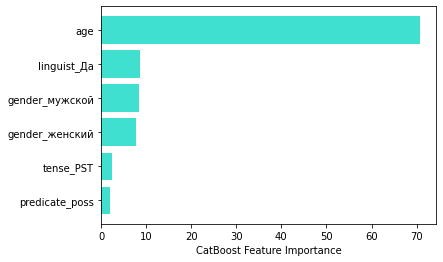

In [68]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# plt.savefig('images/catboost_FI.png', bbox_inches='tight')

iteritems is deprecated and will be removed in a future version. Use .items instead.


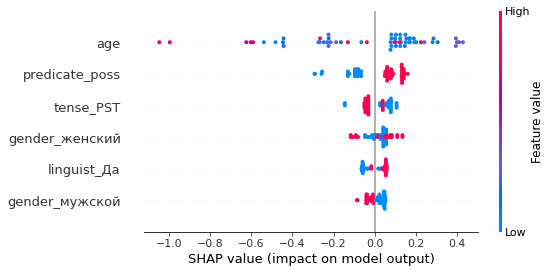

In [69]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X.columns[sorted_feature_importance])

### true categorical

In [70]:
X = pre_X[pre_X.columns[1:]]
y = pre_X['tr_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
train_dataset = cb.Pool(X_train, y_train, cat_features=['linguist', 'gender', 'predicate', 'tense',]) 
test_dataset = cb.Pool(X_test, y_test, cat_features=['linguist', 'gender', 'predicate', 'tense',])
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 5, 8],
        'l2_leaf_reg': [0.2, 0.5, 1]}
model.grid_search(grid, train_dataset)

0:	learn: 1.0247835	test: 0.9575453	best: 0.9575453 (0)	total: 1.95ms	remaining: 193ms
1:	learn: 1.0237883	test: 0.9581090	best: 0.9575453 (0)	total: 2.42ms	remaining: 118ms
2:	learn: 1.0222362	test: 0.9590722	best: 0.9575453 (0)	total: 2.7ms	remaining: 87.3ms
3:	learn: 1.0207435	test: 0.9603014	best: 0.9575453 (0)	total: 2.98ms	remaining: 71.6ms
4:	learn: 1.0190560	test: 0.9608841	best: 0.9575453 (0)	total: 3.31ms	remaining: 62.9ms
5:	learn: 1.0187335	test: 0.9611493	best: 0.9575453 (0)	total: 3.64ms	remaining: 57.1ms
6:	learn: 1.0169234	test: 0.9618885	best: 0.9575453 (0)	total: 4.42ms	remaining: 58.8ms
7:	learn: 1.0155896	test: 0.9629227	best: 0.9575453 (0)	total: 5.22ms	remaining: 60ms
8:	learn: 1.0143648	test: 0.9632708	best: 0.9575453 (0)	total: 6.52ms	remaining: 66ms
9:	learn: 1.0137207	test: 0.9638268	best: 0.9575453 (0)	total: 7.24ms	remaining: 65.2ms
10:	learn: 1.0131101	test: 0.9647794	best: 0.9575453 (0)	total: 7.93ms	remaining: 64.2ms
11:	learn: 1.0124374	test: 0.9657621	b

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [71]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.93
R2: 0.02


Text(0.5, 0, 'CatBoost Feature Importance')

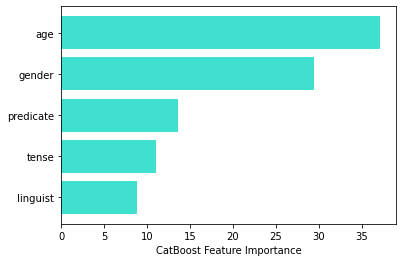

In [72]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# plt.savefig('images/catboost_FI_ctg.png', bbox_inches='tight')

### no metadata

In [77]:
X = X[['predicate', 'tense',]]
y = pre_X['tr_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
train_dataset = cb.Pool(X_train, y_train, cat_features=['predicate', 'tense']) 
test_dataset = cb.Pool(X_test, y_test, cat_features=['predicate', 'tense'])
model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 5, 8],
        'l2_leaf_reg': [0.2, 0.5, 1]}
model.grid_search(grid, train_dataset)

iteritems is deprecated and will be removed in a future version. Use .items instead.


0:	learn: 1.0263248	test: 0.9568636	best: 0.9568636 (0)	total: 732us	remaining: 72.5ms
1:	learn: 1.0258498	test: 0.9579706	best: 0.9568636 (0)	total: 1.48ms	remaining: 72.7ms
2:	learn: 1.0257216	test: 0.9581693	best: 0.9568636 (0)	total: 1.98ms	remaining: 63.9ms
3:	learn: 1.0252819	test: 0.9592521	best: 0.9568636 (0)	total: 2.49ms	remaining: 59.7ms
4:	learn: 1.0248679	test: 0.9603136	best: 0.9568636 (0)	total: 3.07ms	remaining: 58.4ms
5:	learn: 1.0247369	test: 0.9607774	best: 0.9568636 (0)	total: 3.56ms	remaining: 55.9ms
6:	learn: 1.0243548	test: 0.9618067	best: 0.9568636 (0)	total: 4.04ms	remaining: 53.6ms
7:	learn: 1.0239950	test: 0.9628147	best: 0.9568636 (0)	total: 4.27ms	remaining: 49.1ms
8:	learn: 1.0236563	test: 0.9638015	best: 0.9568636 (0)	total: 4.82ms	remaining: 48.7ms
9:	learn: 1.0233374	test: 0.9647673	best: 0.9568636 (0)	total: 5.18ms	remaining: 46.6ms
10:	learn: 1.0230372	test: 0.9657122	best: 0.9568636 (0)	total: 5.91ms	remaining: 47.9ms
11:	learn: 1.0227545	test: 0.966

{'params': {'depth': 2,
  'l2_leaf_reg': 1,
  'iterations': 100,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45

In [78]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 0.97
R2: -0.08


Text(0.5, 0, 'CatBoost Feature Importance')

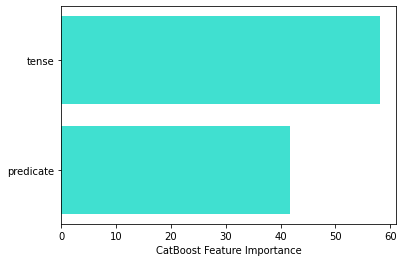

In [79]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# plt.savefig('images/catboost_FI_no_metadata.png')

iteritems is deprecated and will be removed in a future version. Use .items instead.


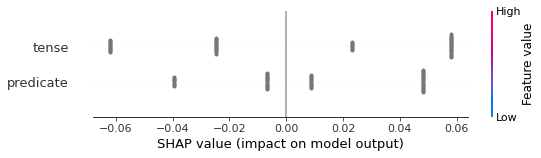

In [80]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X.columns[sorted_feature_importance])

## significance testing

colloc vs case, colloc vs mod: significance tests

In [81]:
pre_X.head()

,tr_value,linguist,gender,age,predicate,tense
293,-0.949653,Нет,женский,37,poss,NPST
294,1.311425,Да,женский,19,poss,NPST
295,0.859210,Да,женский,21,poss,NPST
296,0.859210,Да,женский,19,poss,NPST
297,-0.949653,Нет,мужской,20,poss,NPST


In [83]:
from scipy.stats import chisquare
from scipy.stats import f_oneway

# predicate vs tense

# expected distribution of case -- no colloc
expected_dist = pre_X.loc[pre_X['predicate'] == 'seem'].groupby('tense').mean()['tr_value'].tolist()

# observed distribution of case -- colloc
observed_dist = pre_X.loc[pre_X['predicate'] == 'poss'].groupby('tense').mean()['tr_value'].tolist()

chisquare(observed_dist, expected_dist)

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


Power_divergenceResult(statistic=-5.565049534154145e-16, pvalue=1.0)

In [85]:
# one-way ANOVA

samples = []

for predicate in pre_X.predicate.unique():
    for tense in pre_X.tense.unique():
        samples.append(pre_X.loc[(pre_X['predicate'] == predicate) & (pre_X['tense'] == tense), 'tr_value'].tolist())

f_oneway(*samples)

F_onewayResult(statistic=3.4677706216366424e-30, pvalue=1.0)

In [98]:
pre_X

,tr_value,linguist,gender,age,predicate,tense
293,-0.949653,Нет,женский,37,poss,NPST
294,1.311425,Да,женский,19,poss,NPST
295,0.859210,Да,женский,21,poss,NPST
296,0.859210,Да,женский,19,poss,NPST
297,-0.949653,Нет,мужской,20,poss,NPST
...,...,...,...,...,...,...
588,0.496186,Нет,мужской,29,seem,PST
589,0.496186,Да,другое,21,seem,PST
590,0.496186,Да,женский,20,seem,PST
591,0.496186,Да,женский,19,seem,PST


In [112]:
from scipy.stats import ttest_ind

res = ttest_ind(
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'PST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'PST'), 'tr_value'],
)
res

Ttest_indResult(statistic=3.532693694836686e-17, pvalue=1.0)

In [113]:
ttest_ind(
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'NPST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'NPST'), 'tr_value'],
)

Ttest_indResult(statistic=2.6198611222828393e-15, pvalue=0.9999999999999979)

In [116]:
import scipy.stats as sps

sps.mannwhitneyu(
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'PST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'PST'), 'tr_value'],
)

MannwhitneyuResult(statistic=3029.0, pvalue=0.9646231275766731)

In [117]:
sps.mannwhitneyu(
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'NPST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'NPST'), 'tr_value'],
)

MannwhitneyuResult(statistic=2626.0, pvalue=0.8362540413238658)

In [121]:
for dist in [
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'PST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'PST'), 'tr_value'],    
    pre_X.loc[(pre_X['predicate'] == 'poss') & (pre_X['tense'] == 'NPST'), 'tr_value'],
    pre_X.loc[(pre_X['predicate'] == 'seem') & (pre_X['tense'] == 'NPST'), 'tr_value'],
]:
    print(sps.normaltest(dist))

NormaltestResult(statistic=2.3314116810973675, pvalue=0.31170257205308427)
NormaltestResult(statistic=26.626257582302458, pvalue=1.6526528204654404e-06)
NormaltestResult(statistic=21.81171681173188, pvalue=1.835041430359578e-05)
NormaltestResult(statistic=27.806942121134462, pvalue=9.157970476085939e-07)
